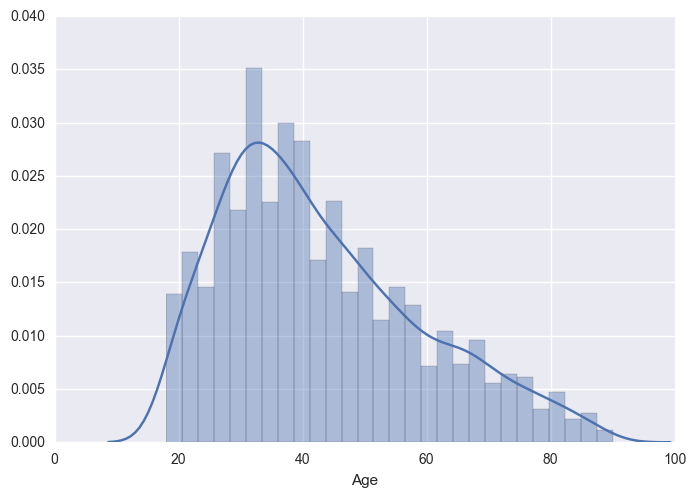

In [97]:
%matplotlib inline
from pandas import read_csv, DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

data = read_csv('drivers_5000.csv')

sns.distplot(data.Age, label="Age")

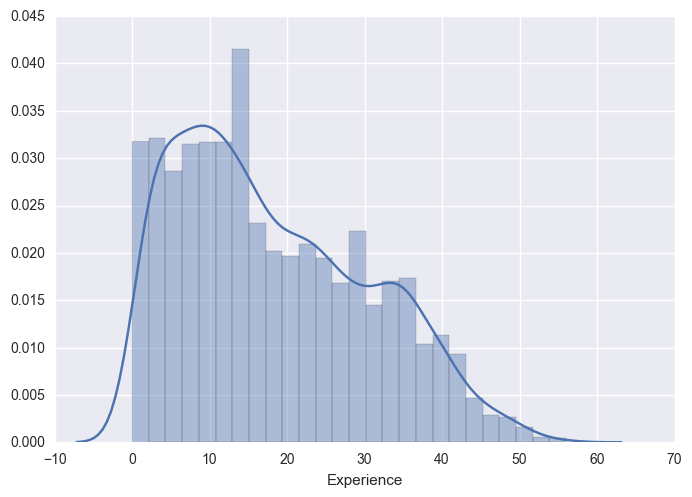

In [98]:
sns.distplot(data.Experience)

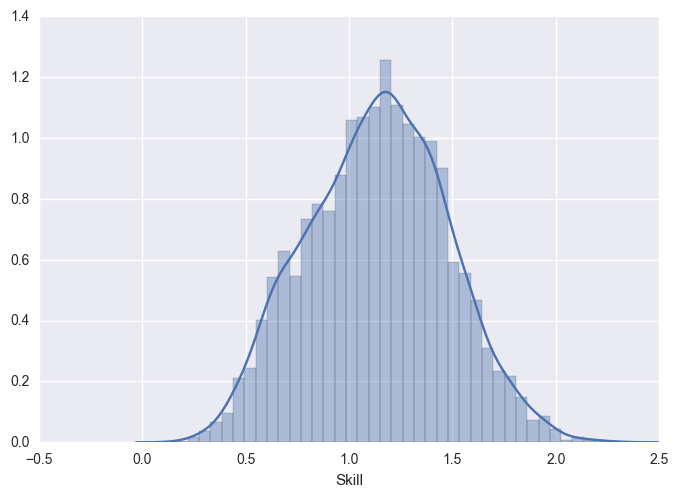

In [99]:
sns.distplot(data.Skill)

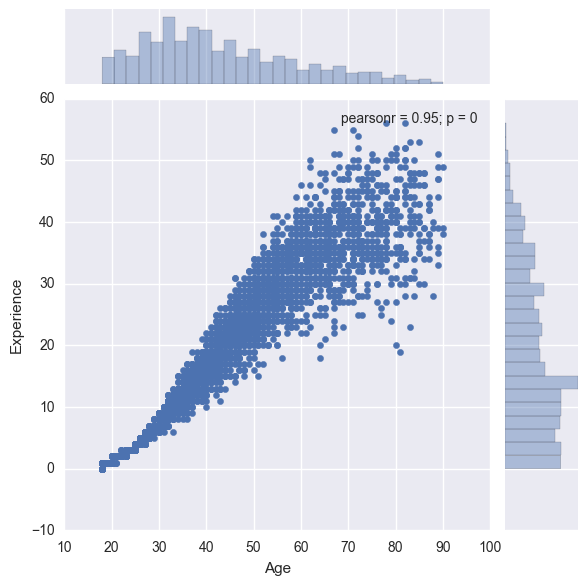

In [100]:
sns.jointplot(x="Age", y="Experience", data=data);

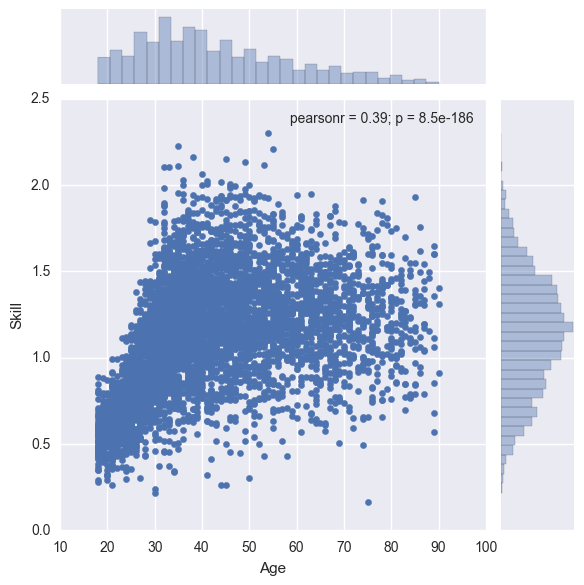

In [101]:
sns.jointplot(x="Age", y="Skill", data=data);

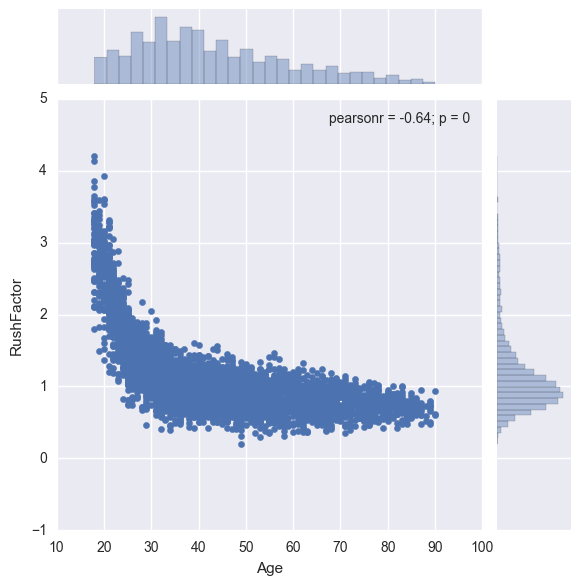

In [102]:
sns.jointplot(x="Age", y="RushFactor", data=data);

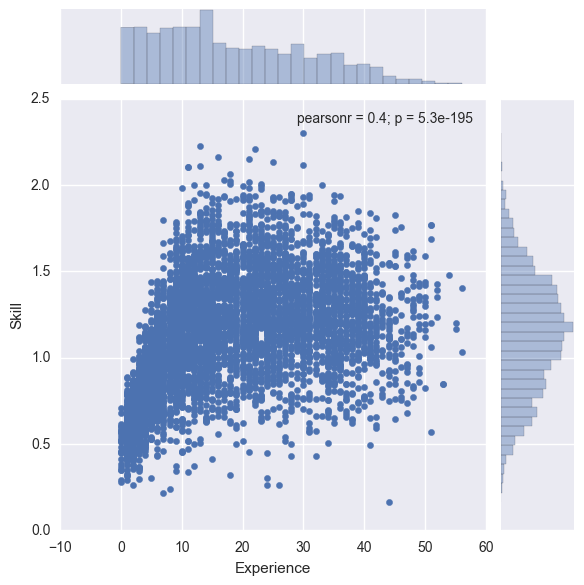

In [103]:
sns.jointplot(x="Experience", y="Skill", data=data);

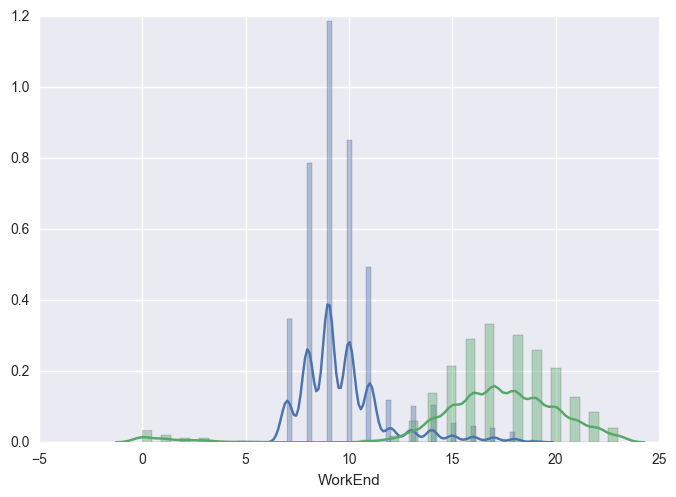

In [104]:
sns.distplot(data.WorkStart, label="Work start")
sns.distplot(data.WorkEnd, label="Work end")

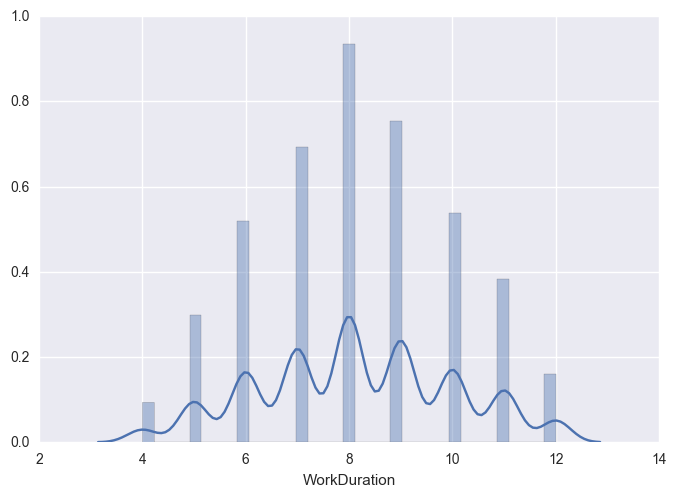

In [105]:
sns.distplot(data.WorkDuration, label="Work duration")

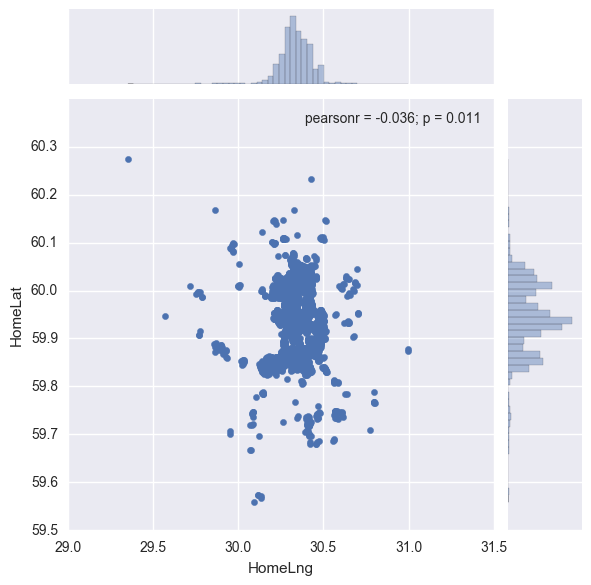

In [106]:
sns.jointplot(x="HomeLng", y="HomeLat", data=data);

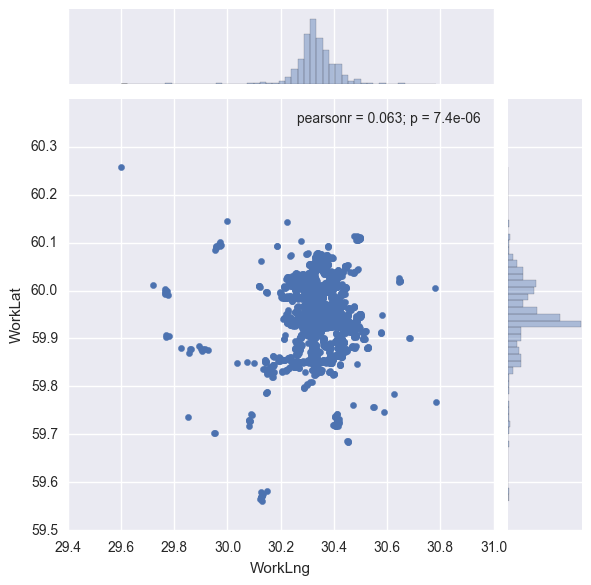

In [107]:
sns.jointplot(x="WorkLng", y="WorkLat", data=data);

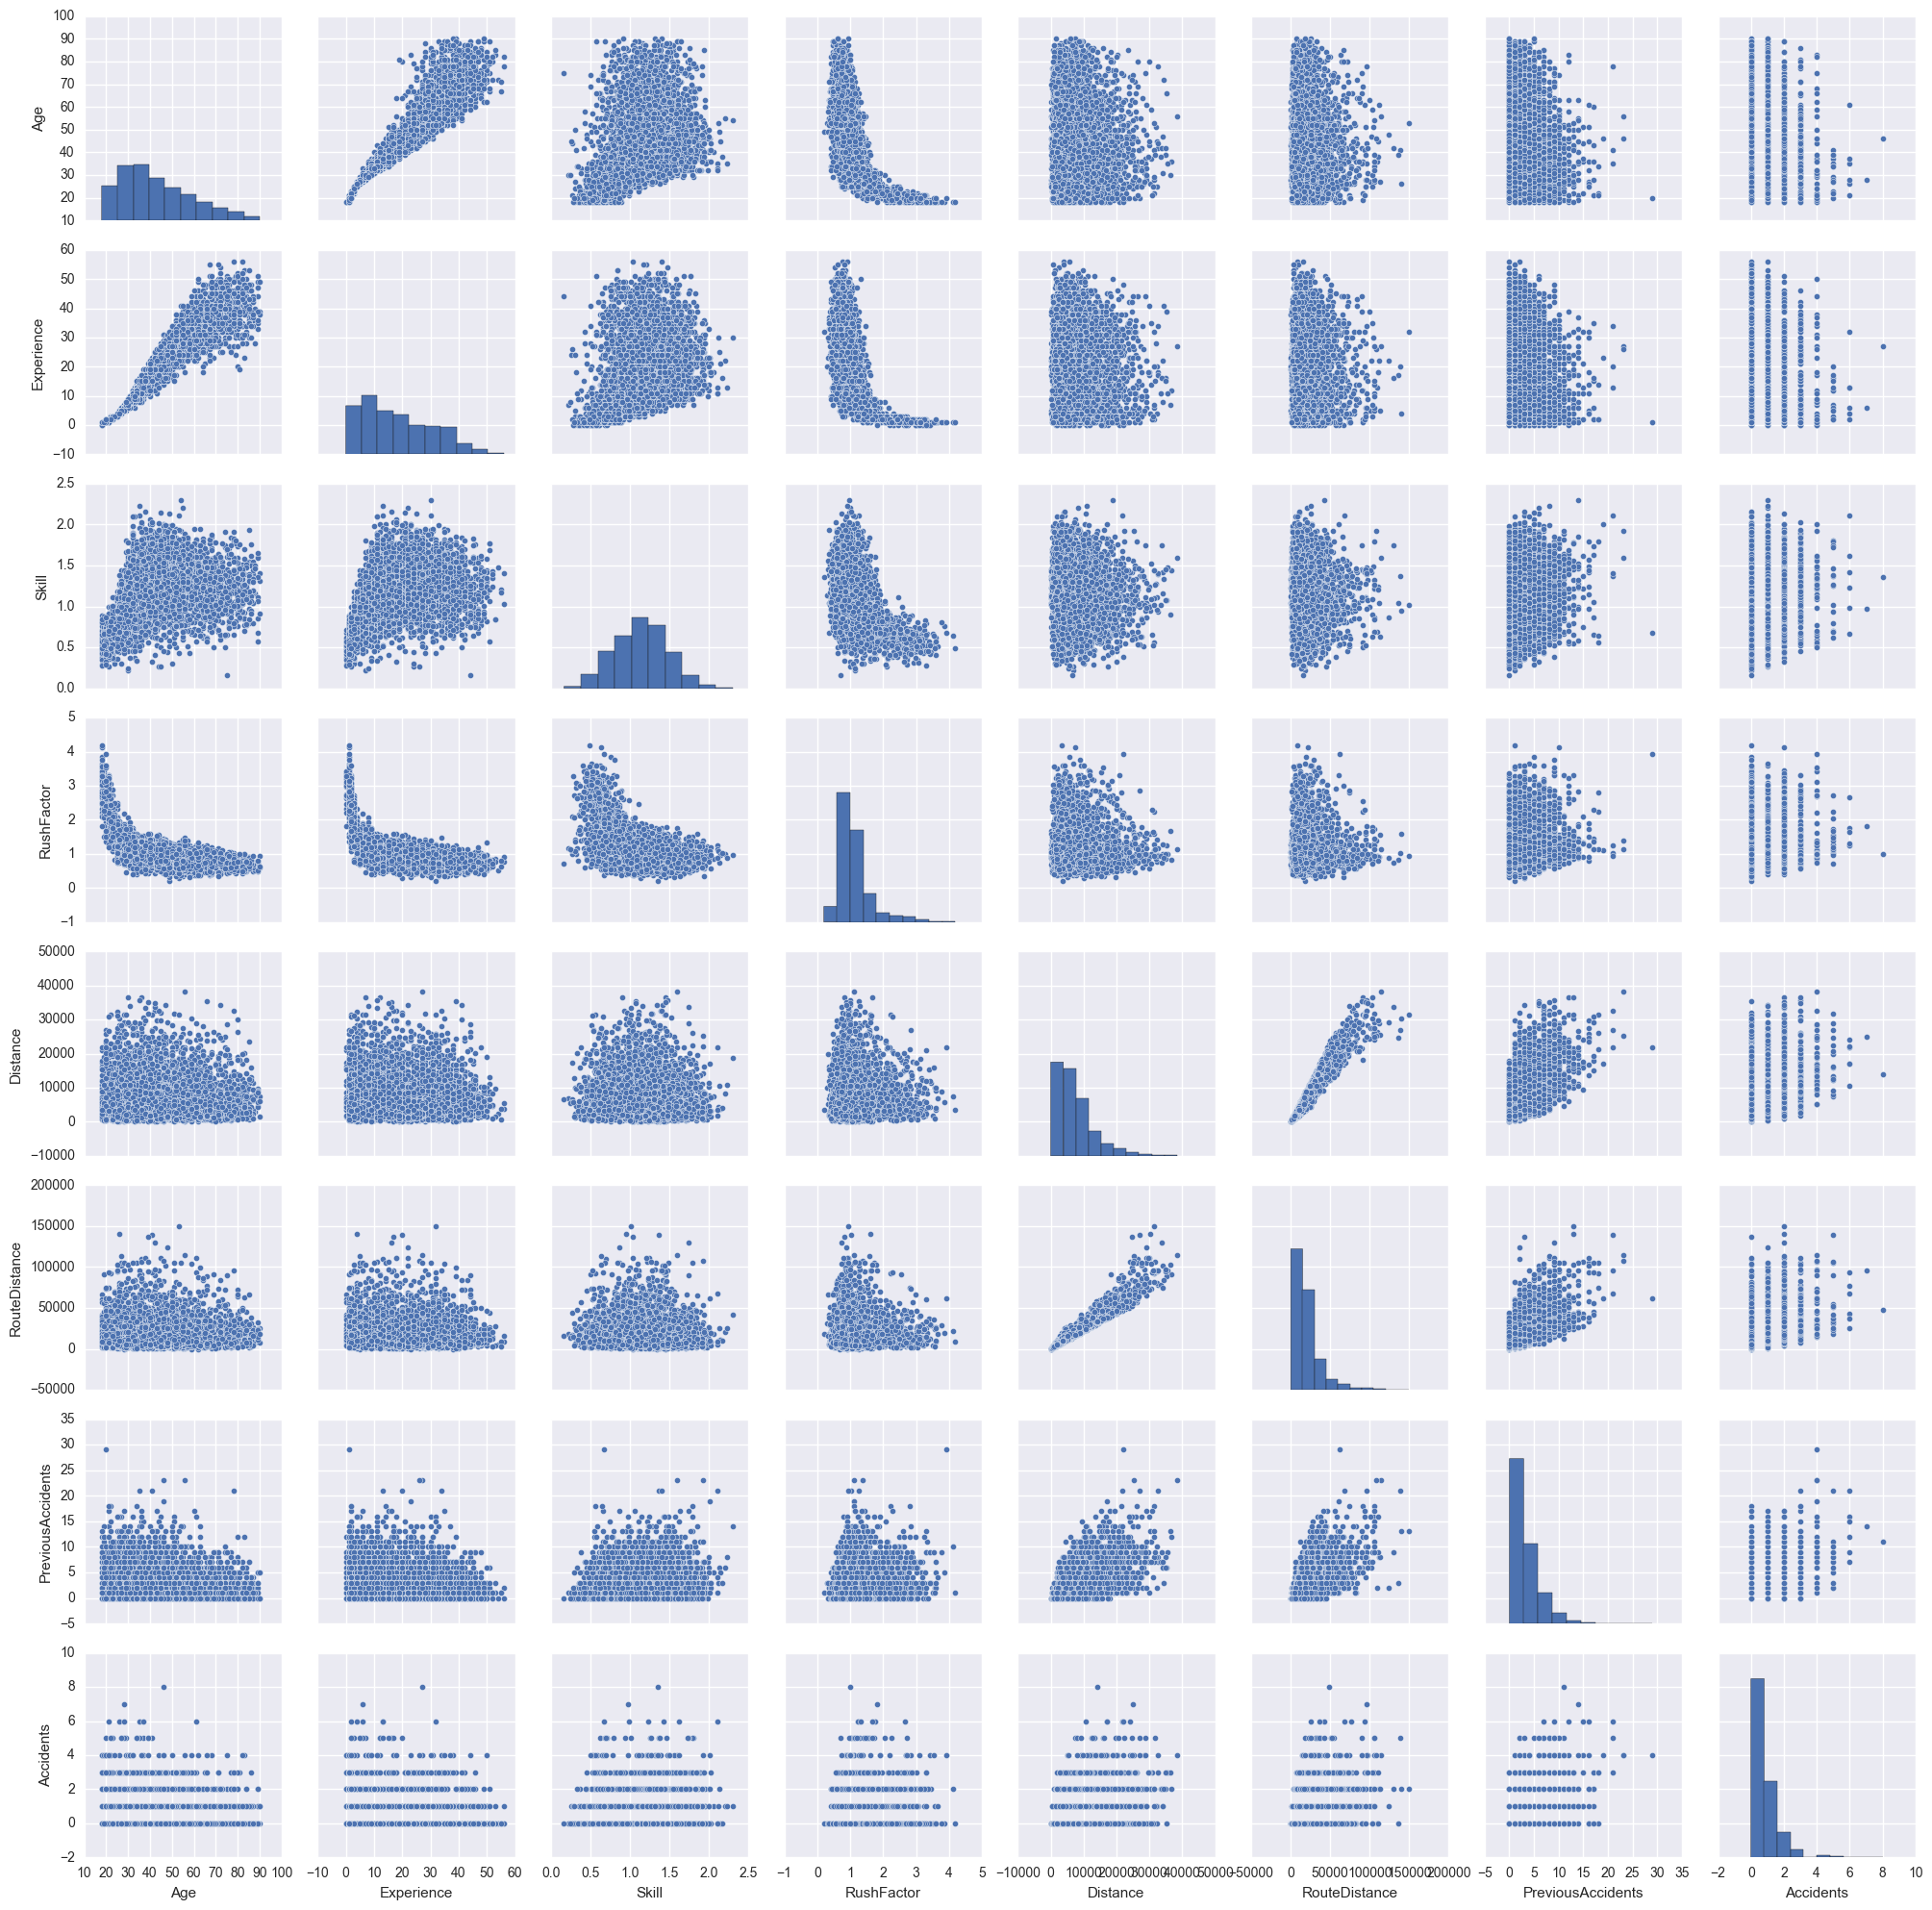

In [108]:
data = data.drop(['WorkStart','WorkDuration','WorkEnd','WorkLng','WorkLat','HomeLng','HomeLat'], axis=1)
sns.pairplot(data);